In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from numpy import random as rd
import numpy as np
import pandas as pd
from sklearn.manifold import SpectralEmbedding
import math
import networkx as nx
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
from sympy.matrices import Matrix

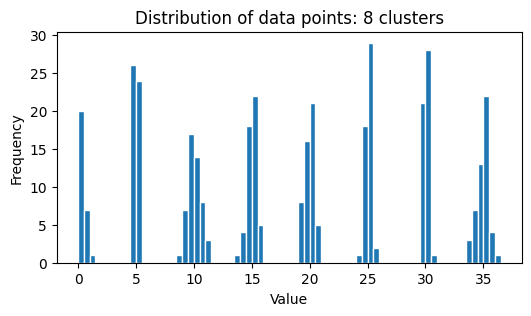

In [2]:
# create clusters
k = 8
num = 50*k
c_std = []
np.random.seed(2)
for i in range(k):
    c_std.append(np.random.rand())

# create points whose values are set between -1 and 1 at random - Pearson correlation coefficient
x = []
k_index = 0
np.random.seed(10)
for j in range(k):
    for i in range(50):
        x.append(round(rd.normal(loc=5*j, scale=c_std[j]),5))

figure = plt.figure(figsize=(6,3))
plt.hist(x, bins=np.arange(0, 37, 0.5), edgecolor='white')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of data points: {k} clusters')
plt.show()

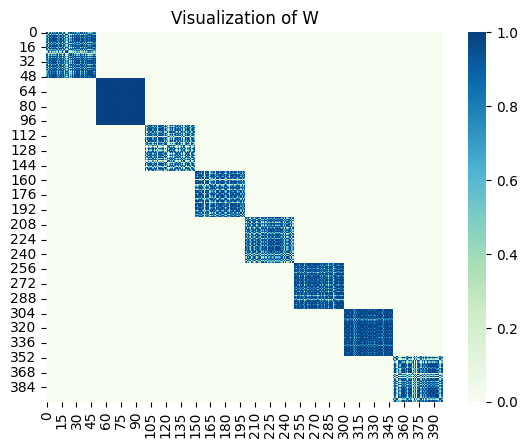

In [3]:
gaussian_weights = []
for i in range(num):
    for j in range(num):
        gaussian_weights.append(round(math.exp(-math.pow(x[i]-x[j],2)),5))
        
W = np.array(gaussian_weights).reshape(num,num)
W = pd.DataFrame(W)

# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(W), cmap=plt.cm.GnBu)
plt.title('Visualization of W')
plt.show() # block diagonal ~ clusters

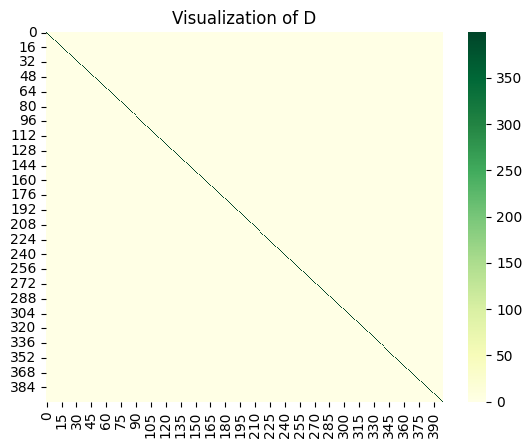

In [4]:
# diagonal matrix
d = 399*np.ones(400)
D = np.diag(d)

# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(D), cmap=plt.cm.YlGn)
plt.title('Visualization of D')
plt.show() # block diagonal ~ clusters

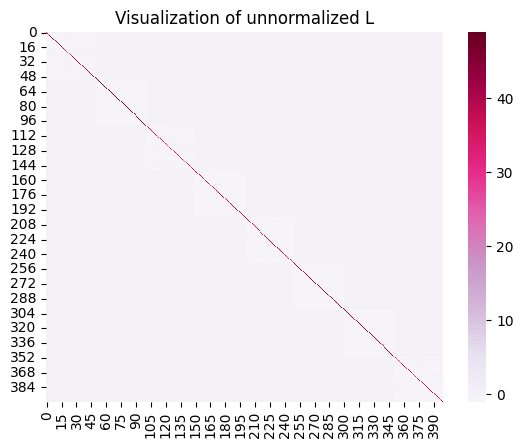

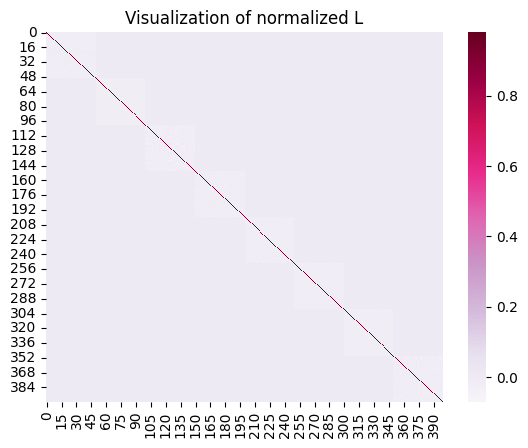

In [5]:
G = nx.from_pandas_adjacency(W)
L = nx.laplacian_matrix(G)
L_norm = nx.normalized_laplacian_matrix(G)
L = L.toarray()

# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(L), cmap=plt.cm.PuRd)
plt.title('Visualization of unnormalized L')
plt.show() # block diagonal ~ clusters

# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(L_norm), cmap=plt.cm.PuRd)
plt.title('Visualization of normalized L')
plt.show() # block diagonal ~ clusters

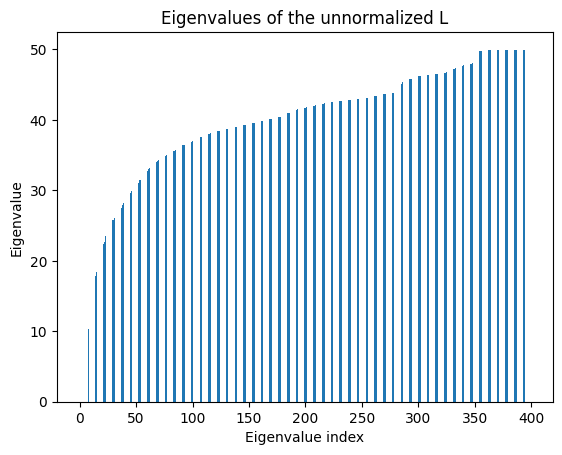

# of unique eigenvalues : 400 out of 400


,smallest,largest
0,-0.00000,49.95855
1,-0.00000,49.95861
2,0.00000,49.95956
3,0.00000,49.96079
4,0.00000,49.96174
5,0.00000,49.96187
6,0.00001,49.96199
7,0.00054,49.96223
8,10.25326,49.96251
9,10.75894,49.96287


In [78]:
# perturbation on L
# for i in range(1,21,1):
#     L_perturbed = L + np.diag(np.power(0.1,i)*np.ones(400))
#     try:
#         np.linalg.inv(L_perturbed)
#     except:
#         print(f'{i} - singular matrix') # well that is not singular from the beginning
try:
    np.linalg.inv(L)
except:
    print('singular matrix')
    
# eigenvalues and vectors calculated by numpy
L_value, L_vector = np.linalg.eigh(L) # already sorted

plt.bar(range(len(L_value)), L_value, width=0.3)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the unnormalized L')
plt.show()

print('# of unique eigenvalues :', len(np.array(np.unique(L_value))), 'out of', len(L_value), ) # multiplicity check
pd.DataFrame({'smallest':[round(i,5) for i in sorted(L_value)[:20]], 'largest':[round(j,5) for j in sorted(L_value)[-20:]]})

In [80]:
# perturbation on L
for i in range(1,21,1):
    L_norm_perturbed = L_norm + np.diag(np.power(0.1,i)*np.ones(400))
    try:
        np.linalg.inv(L_norm_perturbed)
    except:
        print(f'{i} - singular matrix') # well that is not singular from the beginning

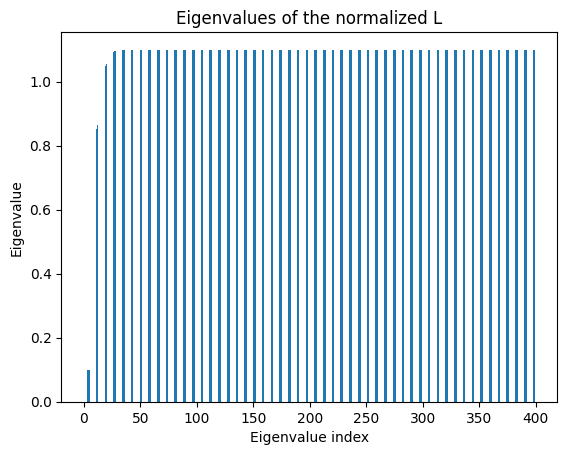

# of unique eigenvalues : 399 out of 400


,smallest,largest
0,0.10001,1.10001
1,0.10001,1.10001
2,0.10001,1.10001
3,0.10001,1.10001
4,0.10001,1.10001
5,0.10001,1.10001
6,0.10001,1.10001
7,0.10002,1.10001
8,0.70038,1.10001
9,0.74331,1.10001


In [91]:
L_norm = L_norm + np.diag(np.power(0.1,10)*np.ones(400))

try:
    np.linalg.inv(L_norm)
except:
    print('singular matrix')
    
# eigenvalues and vectors calculated by numpy
L_norm_value, L_norm_vector = np.linalg.eigh(L_norm) # already sorted

plt.bar(range(len(L_norm_value)), L_norm_value, width=0.3)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the normalized L')
plt.show()

print('# of unique eigenvalues :', len(np.array(np.unique(L_norm_value))), 'out of', len(L_norm_value), ) # multiplicity check
pd.DataFrame({'smallest':[round(i,5) for i in sorted(L_norm_value)[:20]], 'largest':[round(j,5) for j in sorted(L_norm_value)[-20:]]})

In [84]:
# random color generation
# colors
import random
random.seed(324)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(60)]

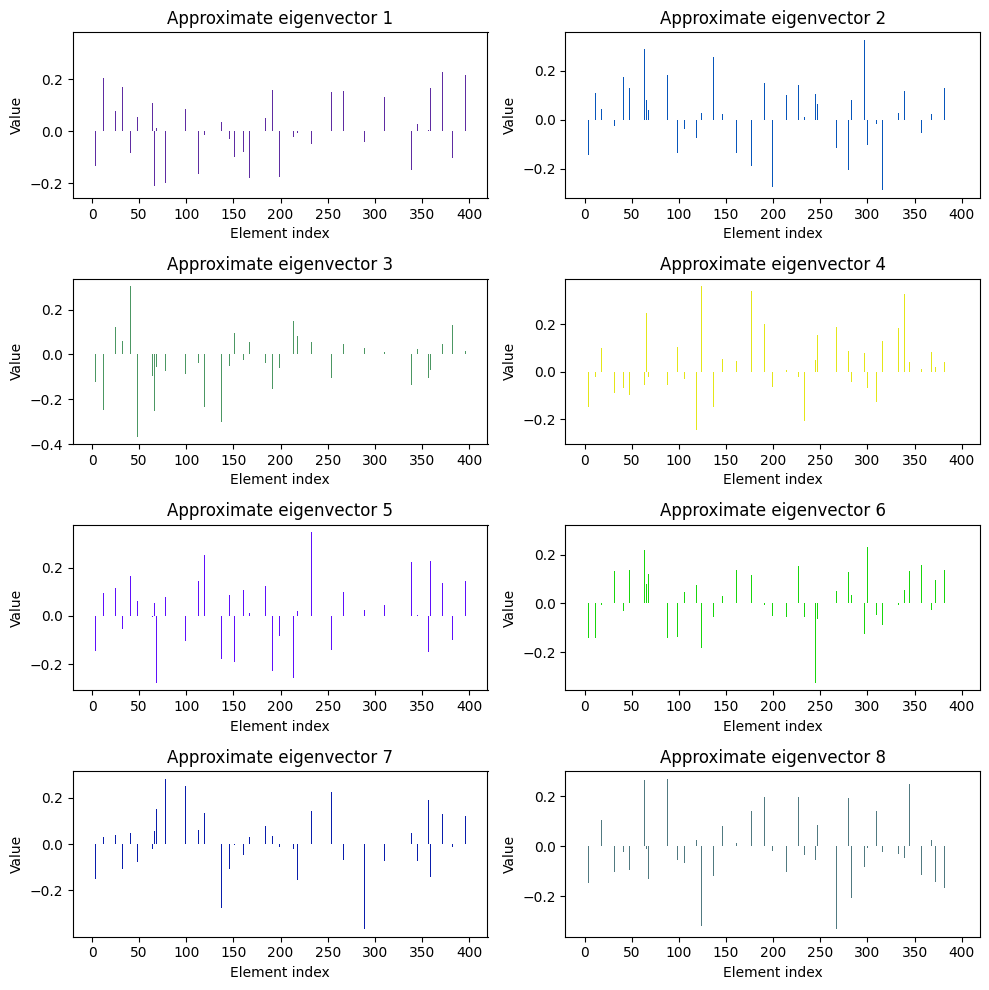

In [90]:
# Set up the figure and axes to display 2 plots per row
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))  # 4 rows, 2 columns for 8 plots
axes = axes.flatten()  # Flatten the 2D array for easier indexing

# Loop through eigenvectors and plot each one
for i in range(8):
    axes[i].bar(range(400), L_norm_vector[i], color=colors[i])
    axes[i].set_xlabel('Element index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Approximate eigenvector {i+1}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# none of them are unit vectors

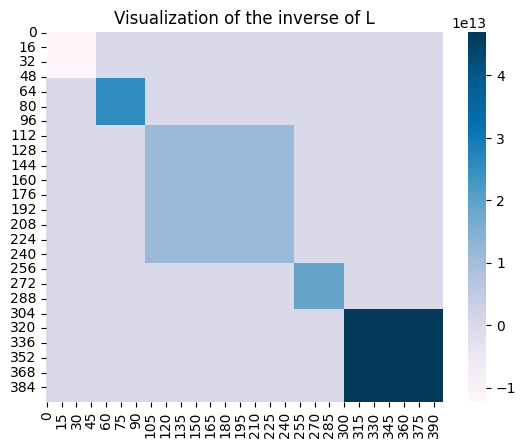

In [93]:
# perturbation on L; this L does not need perturbation as it is already invertible
L_inv = np.linalg.inv(L)

sns.heatmap(pd.DataFrame(L_inv), cmap=plt.cm.PuBu)
plt.title('Visualization of the inverse of L')
plt.show() # block diagonal ~ clusters

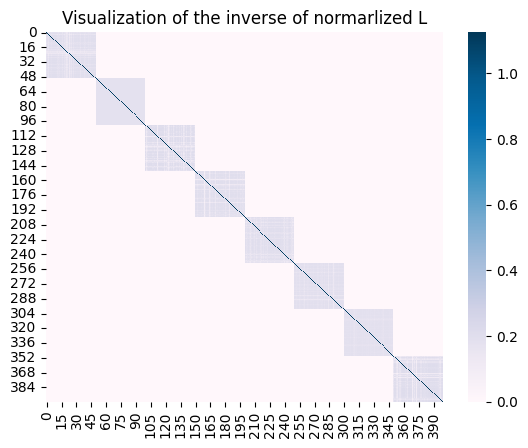

In [92]:
# perturbation on L; this L does not need perturbation as it is already invertible
L_norm_inv = np.linalg.inv(L_norm)

sns.heatmap(pd.DataFrame(L_norm_inv), cmap=plt.cm.PuBu)
plt.title('Visualization of the inverse of normarlized L')
plt.show() # block diagonal ~ clusters

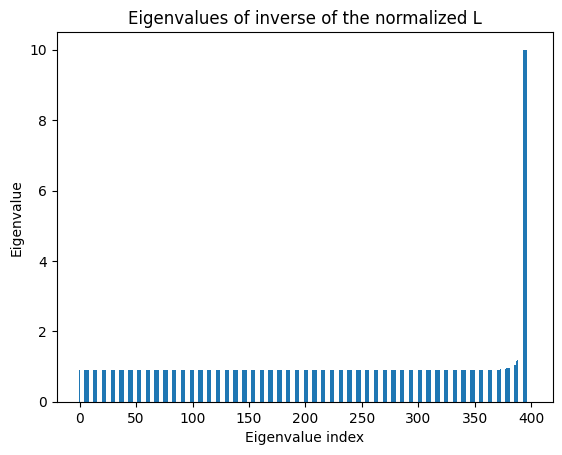

# of unique eigenvalues : 398 out of 400


,smallest,largest
0,0.90908,0.95252
1,0.90908,0.95980
2,0.90908,0.97819
3,0.90908,0.98569
4,0.90908,1.03194
5,0.90908,1.03296
6,0.90908,1.04649
7,0.90908,1.15682
8,0.90908,1.17476
9,0.90908,1.20257


In [107]:
L_norm_inv_value, L_norm_inv_vector = np.linalg.eigh(L_norm_inv) # already sorted

plt.bar(range(len(L_norm_inv_value)), L_norm_inv_value, width=0.5)
# plt.xlim(390,400)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of inverse of the normalized L')
plt.show()

print('# of unique eigenvalues :', len(np.array(np.unique(L_norm_inv_value))), 'out of', len(L_norm_inv_value), ) # multiplicity check
larg_temp = np.array(round(j,5) for j in sorted(L_norm_inv_value)[-20:])
pd.DataFrame({'smallest':[round(i,5) for i in sorted(L_norm_inv_value)[:20]], 'largest':np.flip(larg_temp)})

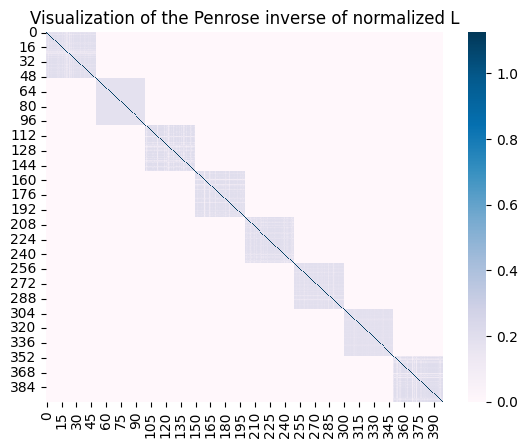

In [100]:
L_norm_pinv = np.linalg.pinv(L_norm)

sns.heatmap(pd.DataFrame(L_norm_pinv), cmap=plt.cm.PuBu)
plt.title('Visualization of the Penrose inverse of normalized L')
plt.show() # block diagonal ~ clusters

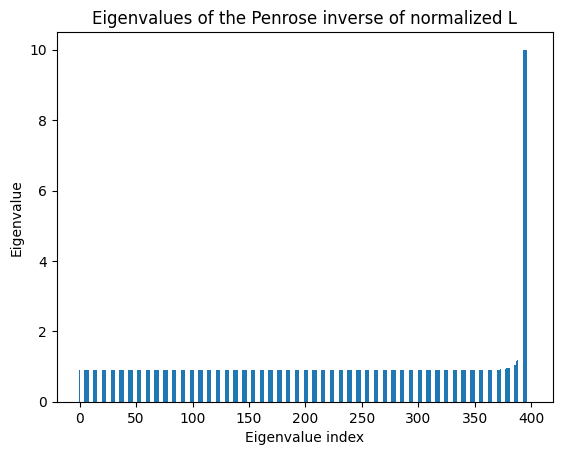

# of unique eigenvalues : 400 out of 400


,largest,smallest
0,0.90908,1.34534
1,0.90908,1.42780
2,0.90908,9.99750
3,0.90908,9.99897
4,0.90908,9.99899
5,0.90908,9.99900
6,0.90908,9.99900
7,0.90908,9.99900
8,0.90908,9.99900
9,0.90908,9.99900


In [254]:
 # eigenvalues and vectors calculated by numpy
L_norm_pinv_value, L_norm_pinv_vector = np.linalg.eigh(L_norm_pinv) # already sorted

plt.bar(range(len(L_norm_pinv_value)), L_norm_pinv_value, width=0.5)
# plt.xlim(390,400)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Penrose inverse of normalized L')
plt.show()

print('# of unique eigenvalues :', len(np.array(np.unique(L_norm_pinv_value))), 'out of', len(L_norm_pinv_value), ) # multiplicity check
pd.DataFrame({'largest':[round(i,5) for i in L_norm_pinv_value[:10]], 'smallest':[round(j,5) for j in L_norm_pinv_value[-10:]]})

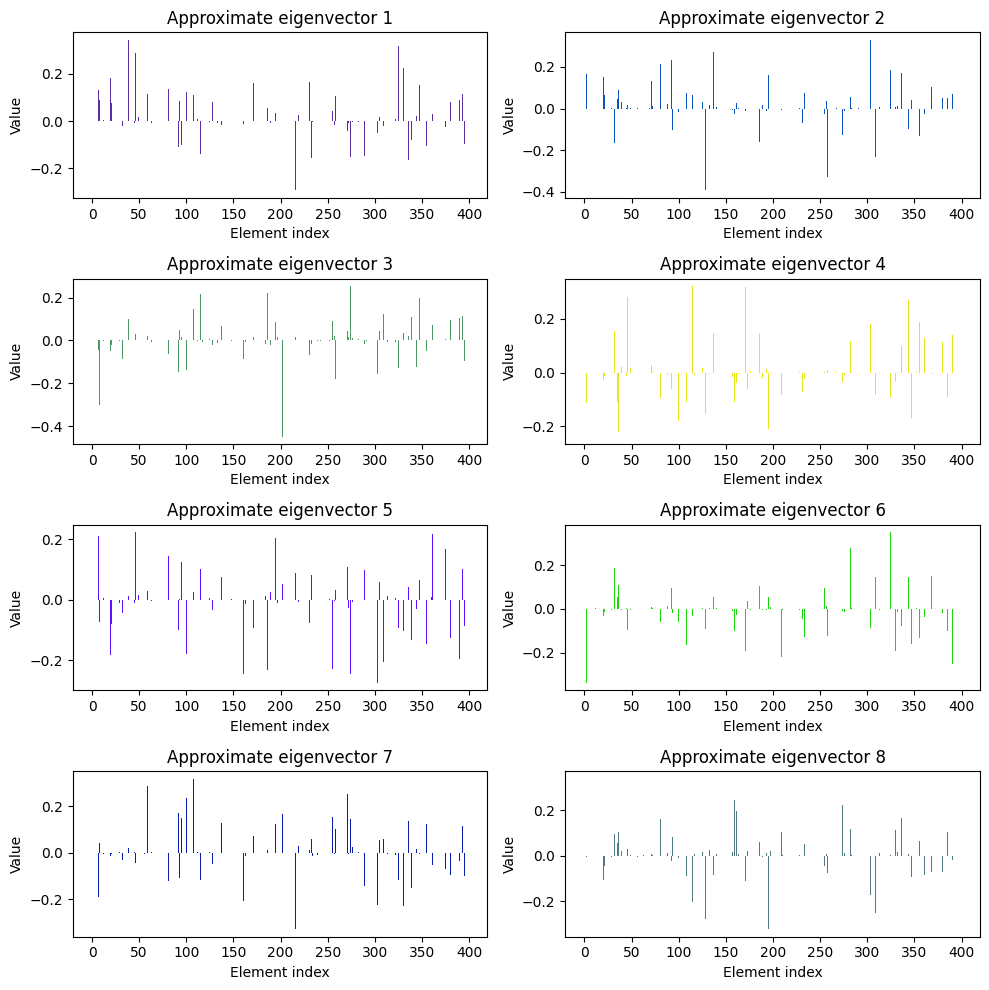

In [255]:
# Set up the figure and axes to display 2 plots per row
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))  # 4 rows, 2 columns for 8 plots
axes = axes.flatten()  # Flatten the 2D array for easier indexing
L_norm_pinv_vector_toplot = L_norm_pinv_vector[-8:]
# Loop through eigenvectors and plot each one
for i in range(8):
    axes[i].bar(range(400), L_norm_pinv_vector_toplot[i], color=colors[i])
    axes[i].set_xlabel('Element index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Approximate eigenvector {i+1}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [249]:
# compare their spectrum
np.square(np.subtract(L_norm_inv_value, L_norm_pinv_value)).mean()

5.901542387668254e-30

In [241]:
np.flip(L_norm_inv_value)[:10]

array([9.99900008, 9.99900008, 9.99900008, 9.99900008, 9.99900008,
       9.99898897, 9.99897289, 9.99750173, 1.42780264, 1.34534016])

0.005000000000000001 5.326291007919909e-20


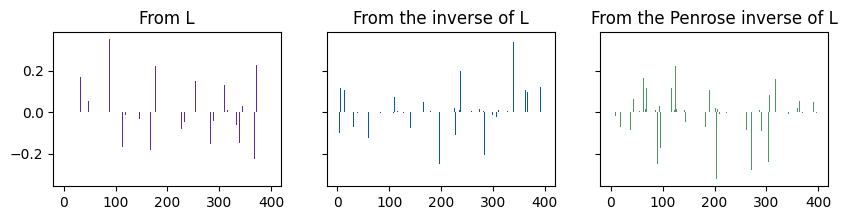

0.005 1.8928897711651004e-21


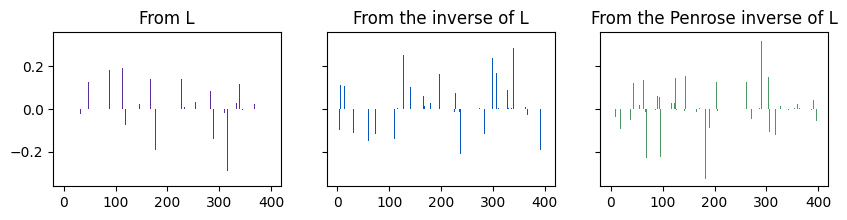

0.005 5.644954301757015e-21


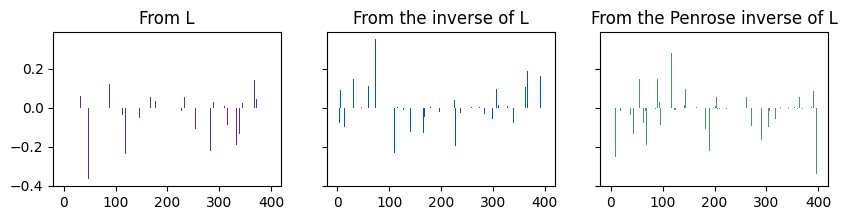

0.005000000000000001 1.804340726000684e-19


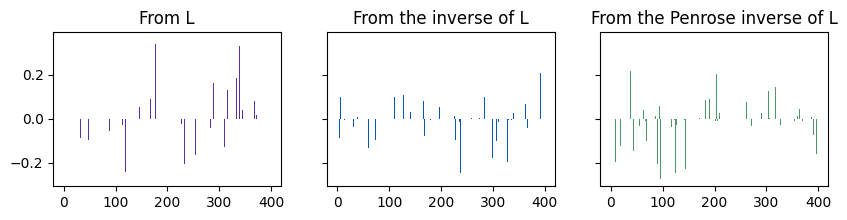

0.005000000000000001 3.1565534823292456e-20


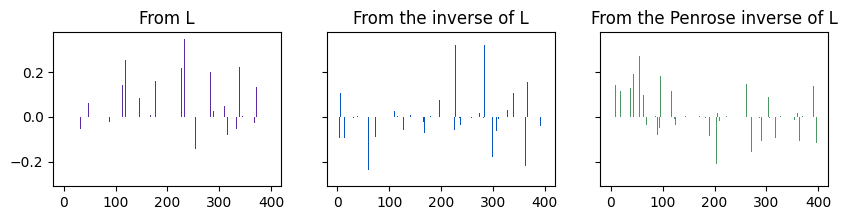

0.004999999999999999 8.0663563038241825e-22


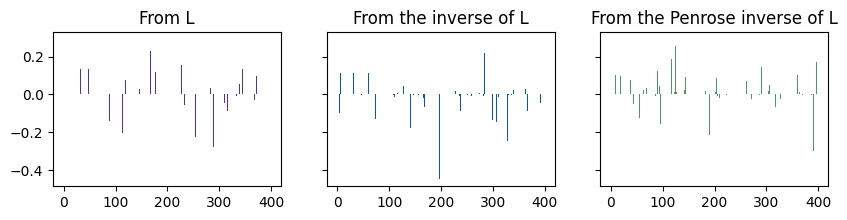

0.005000000000000002 5.0675693677293214e-20


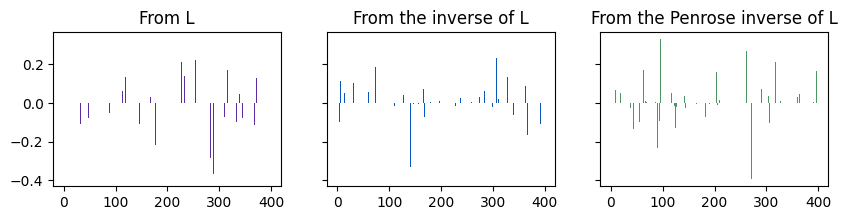

0.005000000000000001 4.1803666756461486e-20


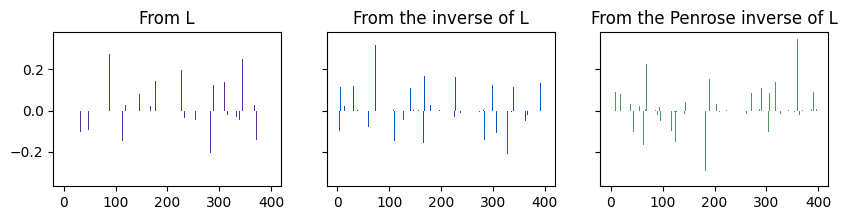

In [247]:
# compare eigenvectors of the inverse and the Penrose inverse 
for i in range(8):
    fig, axs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,2))
    axs[0].bar(range(400), L_norm_vector[i], color=colors[0]) # there are eight of them
    axs[0].set_title('From L')
    axs[1].bar(range(400), np.flip(L_norm_inv_vector)[i], color=colors[1]) # there are eight of them
    axs[1].set_title('From the inverse of L')
    axs[2].bar(range(400), np.flip(L_norm_pinv_vector)[i], color=colors[2])
    axs[2].set_title('From the Penrose inverse of L')
    print(np.square(np.subtract(np.flip(L_norm_inv_vector)[i], L_norm_vector)[i]).mean(),
          np.square(np.subtract(np.flip(L_norm_inv_vector)[i], np.flip(L_norm_pinv_vector)[i]).mean()))
    plt.show()

In [258]:
# Laplacian eigenmaps with eigenvectors of the inverse matrices
def LaplacianEigenmapsInv(vec, num, x):
    try:
        eig_vecs = []
        for i in range(num):
            eig_vecs.append(np.flip(vec)[i]) 
        K = np.column_stack(eig_vecs)
        # linear dependence
        print(Matrix(K).rref()[1])
    
        K_t = np.transpose(K)
        x_c = np.matmul(K,np.matmul(np.linalg.inv(np.matmul(K_t,K)), np.matmul(K_t, x)))
    
        figure = plt.figure(figsize=(6,3))
        plt.hist(x_c, bins=np.arange(-20, 20, 0.5), edgecolor='white', color='green') 
        plt.ylim(0,10)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of embedded data points: {num} clusters')
        plt.show()
    except:
        print('error')
    return x_c

(0, 1, 2, 3, 4, 5, 6, 7)


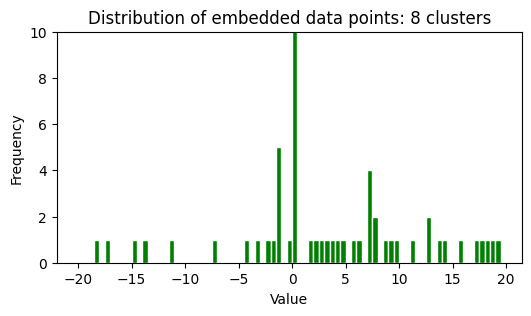

(0, 1, 2, 3, 4, 5, 6, 7)


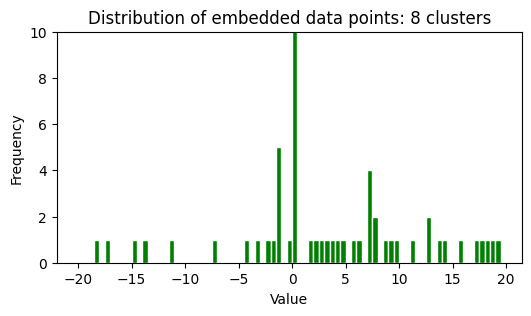

In [259]:
x_l_inv = LaplacianEigenmapsInv(np.flip(L_norm_inv_vector), 8, x)
x_l_pinv = LaplacianEigenmapsInv(np.flip(L_norm_pinv_vector), 8, x)

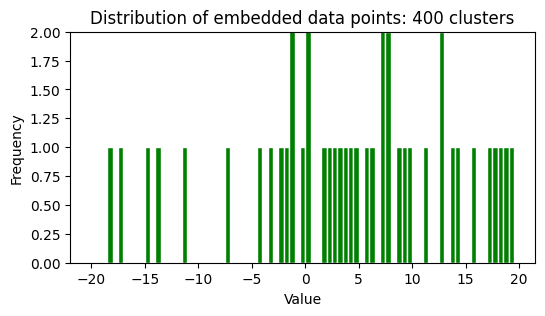

In [239]:
figure = plt.figure(figsize=(6,3))
plt.hist(x_l_inv, bins=np.arange(-20, 20, 0.5), edgecolor='white', color='green') 
plt.ylim(0,2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of embedded data points: {num} clusters')
plt.show()

In [119]:
1/L_norm_value[0]

9.999000079994056

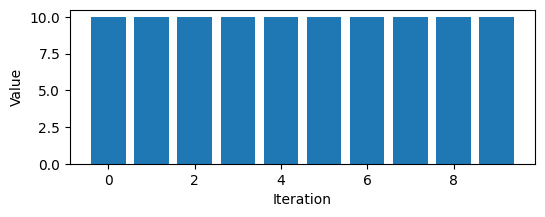

[9.999, 9.999, 9.999]
10 2


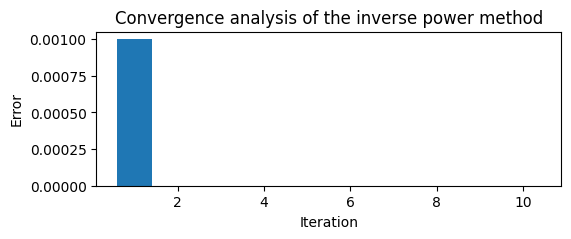

,0
0,1.000080e-03
1,7.999406e-08
2,7.999406e-08
3,7.999406e-08
4,7.999406e-08
5,7.999406e-08
6,7.999406e-08
7,7.999406e-08
8,7.999406e-08
9,7.999406e-08


In [251]:
# matrix in consideration
M = L_norm_inv

x0 = np.transpose(0.1*np.ones(400)) # initial guess
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 10 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(M, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(M, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk

# convergence
plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()
print(labmda_history[-3:])
print(len(labmda_history), len(np.array(np.unique(labmda_history)))) # multiplicity check

# draw it differently
L_val_smallest = 1/L_norm_value[0]

plt.figure(figsize=(6,2))
plt.bar(range(1,len(labmda_history)+1,1), abs(labmda_history-L_val_smallest))
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Convergence analysis of the inverse power method')
plt.show()

pd.DataFrame(abs(labmda_history-L_val_smallest)[:10])

In [252]:
# normalization
def vecMag(v):
    divider = np.sqrt(np.square(v).sum())
    return v/divider

In [ ]:
# 4. deflation method
M = 

labmda_history = []

k = 5 # total number of iterations for power method

# store eigenvalue sand vectors found by iterations
xk_num = 8 # number of eigenvectors you wish to get
xk_vals = []
xk_vecs = []

v_target = [i/sum(x0) for i in x0] # normalized x0; target of L

print('Eigenvalues found :')
for j in range(1, xk_num+1): # repeat these procedures until you get certain number of eigenvectors
    v0 = np.transpose(0.1*np.ones(400)) # initial guess
    v0 = [i/sum(v0) for i in v0] # normalized
    vk = v0 # initial guess multiplied by L k times
    
    labmda_history_elem = [] # initialize an array
    
    # projection
    if j==1: # first iteration
        pass
    elif j==2: # column space consists of only one col vector; no need for stacking
        vk = vk - np.dot(np.matmul(xk_vecs[0], vk)/np.matmul(vk, vk),vk)
    else:
        A = np.column_stack(xk_vecs) # column space
        print(A)
        vk = vk - np.matmul(A, np.matmul(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), vk)))
    
    # iteration for power method
    for i in range(1, k+1):
        vk = np.matmul(M, vk)
        labmda_history_elem.append(np.round(np.matmul(np.matmul(M, vk), vk) / np.matmul(vk,vk), 10)) # Rayleigh quotient

    # store results and go to find the next eigenvector
    # print(f'At {j}-th iteration : {labmda_history_elem[-1]}')
    xk_vals.append(labmda_history_elem[-1]) # converged value
    xk_vecs.append(vecMag(vk)) # normalized vector
    labmda_history.append(labmda_history_elem)
    
print(len(labmda_history[-1]), len(np.array(np.unique(labmda_history[-1])))) # multiplicity check

plt.figure(figsize=(6,2))
plt.bar(range(len(xk_vals)), xk_vals, width=0.1)
plt.xlabel('Iteration')
plt.title('Eigenvalues found by deflation method')
plt.show()

print(xk_vals)